In [19]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap

### Loading The Dataset and splitting it into training and testing sets

In [20]:
# Load dataset
data = load_iris()
X = data.data[:, 2:]  # Use only the last two features for visualization
real_X = data.data
y = data.target

# Split the dataset into training and testing sets
# We use real_X to decide the best model
real_X_train, real_X_test, y_train, y_test = train_test_split(real_X, y, test_size=0.2, random_state=42)
X_train  = real_X_train[:, 2:]
X_test = real_X_test[:, 2:]

# Tuning Hyper Parameters 

In [21]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

Best parameters found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.95
Test set accuracy: 1.00


# Real data training

In [22]:
# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid)

# Fit Grid Search to the data and finding the best model
grid_search.fit(real_X_train, y_train)

# Get the best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.best_estimator_.predict(real_X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

Best parameters found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.95
Test set accuracy: 1.00


# Plotting the Decision Tree

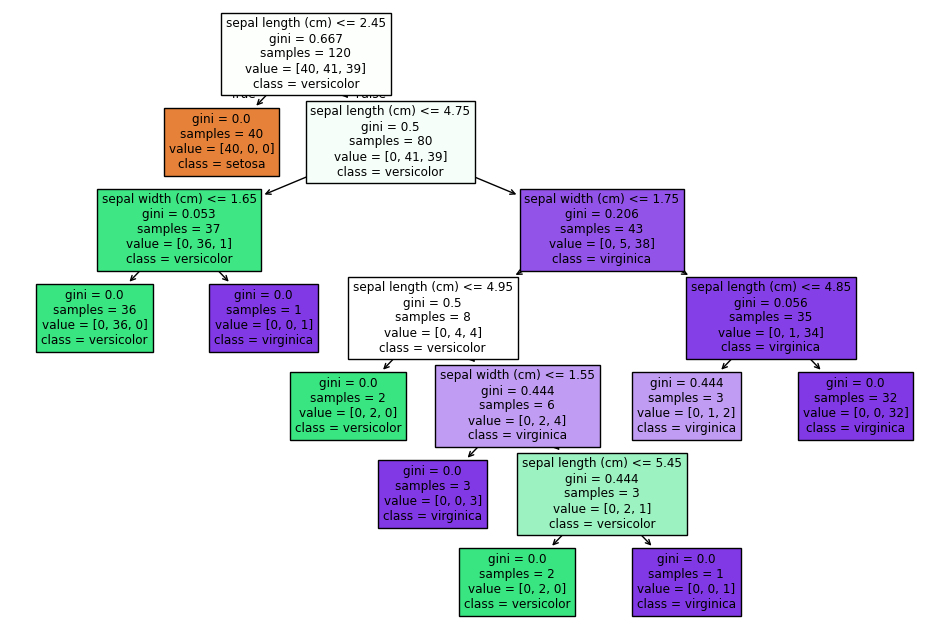

In [23]:
# Plot the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

# Let's Visualize the results

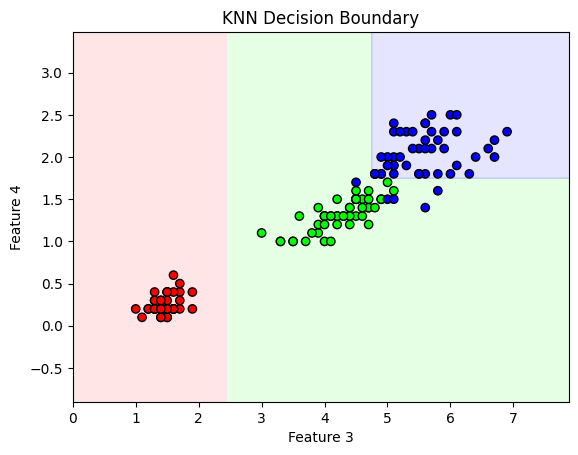

In [24]:
# Define the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid on which we will run our model
all_x_values = np.arange(x_min, x_max, 0.02)
all_y_values = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(all_x_values, all_y_values)

# Predict the class for each point in the mesh grid and ignoring the first two features
flattened_xx = xx.ravel()
flattened_yy = yy.ravel()
Z = best_model.predict(np.c_[flattened_xx, flattened_yy])
Z = Z.reshape(xx.shape)

# print(Z.value_counts())

# Define colors for the plot
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=cmap_points)
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')
plt.title('KNN Decision Boundary')
plt.show()